# Handwritten Characters Generation
In this project, we'll use conditional generative adversarial networks to generate new images of handwritten characters.

### Get the Data

In [1]:
import numpy as np
import gzip
from CGan import Dataset, CGan

In [2]:
%matplotlib inline

In [3]:
import matplotlib
print(matplotlib.__version__)

2.1.1


## MNIST

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


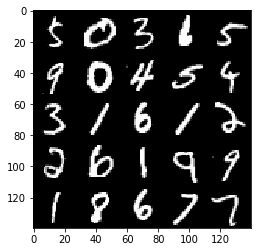

In [4]:
labels_path = './MNIST_train-labels-idx1-ubyte.gz'
images_path = './MNIST_train-images-idx3-ubyte.gz'

with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
         offset=8)
        
with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
        offset=16).reshape(len(labels), 28, 28, 1)
        
dataset = Dataset(images, labels, channels=1)
gan = CGan(dataset, generator_name='mnist')

gan.show_original_images(25)

In [5]:
nclass = 8

Restoring generator graph
INFO:tensorflow:Restoring parameters from mnist/generator.ckpt


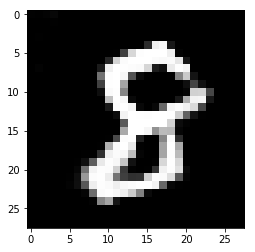

In [6]:
_ = gan.generate_new(target_class=nclass, rows=1, cols=1, plot=True)

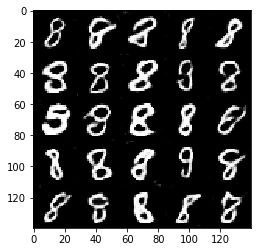

In [7]:
_ = gan.generate_new(target_class=nclass, rows=5, cols=5, plot=True)

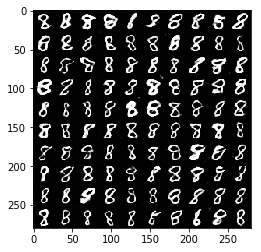

In [8]:
images = gan.generate_new(target_class=nclass, rows=10, cols=10, plot=True)

In [9]:
print(images.shape)

(100, 28, 28, 1)
